In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from scipy.misc import toimage, imresize

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('X_train shape',x_train.shape)
print('Y_train shape',y_train.shape)
print('X_test shape',x_test.shape)
print('Y_test shape',y_test.shape)

X_train shape (50000, 32, 32, 3)
Y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
Y_test shape (10000, 1)


In [4]:
class_names = ["Airplane","Automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

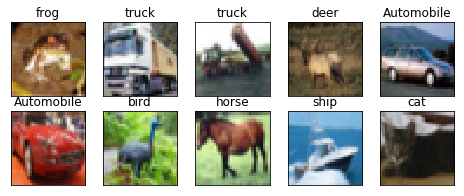

In [5]:
fig = plt.figure(figsize=(8,3))

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im = x_train[i]
    j = y_train[i].item()
    ax.set_title(class_names[j])
    plt.imshow(im)
plt.show()

In [6]:
num_classes = 10

y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

input_size = x_train[0].shape

print('X_train shape',x_train.shape)
print('Y_train shape',y_train.shape)
print('X_test shape',x_test.shape)
print('Y_test shape',y_test.shape)
print('input_size', input_size)

X_train shape (50000, 32, 32, 3)
Y_train shape (50000, 10)
X_test shape (10000, 32, 32, 3)
Y_test shape (10000, 10)
input_size (32, 32, 3)


In [7]:
weight_decay = 1e-4

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [8]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)

In [9]:
batch_size = 64
epochs = 50
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])

H = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch = x_train.shape[0] // batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data = (x_test,y_test)
    )
model.save_weights('cifar10.h5')

Epoch 1/50
781/781 [==============================] - 783s 1s/step - loss: 2.0597 - acc: 0.2499 - val_loss: 1.5356 - val_acc: 0.4106
Epoch 2/50
781/781 [==============================] - 773s 990ms/step - loss: 1.6761 - acc: 0.3949 - val_loss: 1.3213 - val_acc: 0.5392
Epoch 3/50
781/781 [==============================] - 763s 976ms/step - loss: 1.5033 - acc: 0.4730 - val_loss: 1.3413 - val_acc: 0.5608
Epoch 4/50
781/781 [==============================] - 765s 979ms/step - loss: 1.4087 - acc: 0.5146 - val_loss: 1.1104 - val_acc: 0.6330
Epoch 5/50
781/781 [==============================] - 771s 988ms/step - loss: 1.3559 - acc: 0.5431 - val_loss: 1.0584 - val_acc: 0.6436
Epoch 6/50
781/781 [==============================] - 772s 988ms/step - loss: 1.2905 - acc: 0.5658 - val_loss: 1.2314 - val_acc: 0.6203
Epoch 7/50
781/781 [==============================] - 763s 977ms/step - loss: 1.2606 - acc: 0.5792 - val_loss: 1.1048 - val_acc: 0.6753
Epoch 8/50
781/781 [==============================]

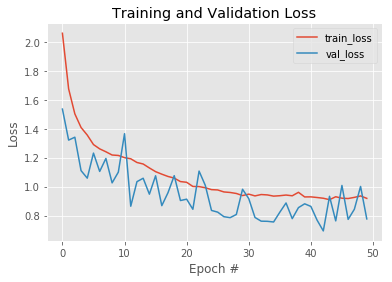

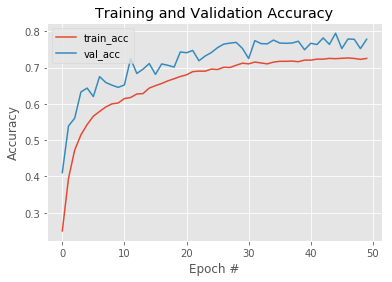

In [10]:
plt.style.use("ggplot")
N = epochs

plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.figure()
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")